In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1-8월 뉴스.csv')
df.head()

,title,text,url,media,date
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
1,일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\n노동의 미래를 모두 알 수는 없다. 다만 현실에서 일어나...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
3,"지혜씨, 지훈씨를 부탁해! [인포그래픽]",새로 태어나는 아이들은 줄어들고 어르신들은 계속 나이를 먹어 갑니다. 2020년 새...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
4,"[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”",새천년의 시작과 함께 세상에 나온 2000년대생들이 어느덧 사회 변화를 이끌 20대...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29041 entries, 0 to 29040
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   29041 non-null  object
 1   text    29041 non-null  object
 2   url     29041 non-null  object
 3   media   29041 non-null  object
 4   date    29041 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Kkma
from tqdm import tqdm
import re

In [5]:
kkma = Kkma() # 형태소 분석기 객체 생성

In [6]:
# clustering을 위해 10,000개 데이터 임의 추출
test_df = df.sample(n=10000, random_state = 2)
test_df.reset_index(inplace=True)
test_df.drop(['index'],axis=1, inplace=True)
test_df

,title,text,url,media,date
0,우주선과 카누 - 케네스 브라워 [주일우의 내 인생의 책 ④],"[경향신문] \n\n\n\n머리가 다 큰 아이와 이야기를 하다가 문득, 그의 생각을...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-06-11
1,5당 비례대표 후보 토론회…더시민·열린민주 날선 공방 [선택 4·15],ㆍ최강욱 “열린민주당 열린 공천 실험 성공”\nㆍ김홍걸 “사회적 약자 배려 의석 빼...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-04-10
2,"이낙연 ""탄핵 정부"" 황교안 ""좌파 독재정권""… 첫 토론서 대립각",서울 종로구에 출마한 더불어민주당 이낙연(오른쪽) 후보와 미래통합당 황교안 후보가 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-04-07
3,전세 종말론? 현장선 “갭투자 쌓여 월세로 급전환 쉽지 않다”,"""월세 전환이요? 말처럼 쉽지 않아요.""\n\n서울 개포동에서 공인중개사무소를 운영...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-04
4,총선후 정치지형 가를 10곳의 승부… 2년뒤 대선 구도까지 보인다,[총선 D―1]핵심 승부처 10곳의 의미는\n총선을 하루 앞두고 여야는 전국의 각 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-04-14
...,...,...,...,...,...
9995,“우리 삶은 바뀐 게 없다… 장애인 차별과 배제 멈춰 달라”,"[서울신문]\n“대통령이 바뀌고 정권이 바뀌었지만, 우리의 삶은 바뀐 게 없다.”\...",https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-04-21
9996,<‘코로나19’ 초비상>신천지 外 또다른 집단 감염원 잡아야 ‘3월 대유행’ 막는다,"인구 68만명 천안, 68명 확진 \n\n댄스 교습소가 초기확산 진원 \n\n일부 ...",https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-03-02
9997,오거돈 낙마 이어 박원순 유고 … 與 재집권 전략 '비상',2021년 4월 예정 보궐선거 판 커져 / 이재명·김경수 재판 등도 변수 / 통합당...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-07-11
9998,박원순 고소인 “4년간 성추행…인간답게 살고 싶다”,“그저 인간답게 살 수 있는 세상을 꿈꿉니다. 저는 살아 있는 사람입니다.”\n\n...,https://news.naver.com/main/read.nhn?mode=LPOD...,한겨레,2020-07-14


In [69]:
# 불용어 사전
# 출처 : https://www.ranks.nl/stopwords/korean
stopwords = pd.read_csv('stop_word_kr.txt',header=None)

# 특수문자 제거
def text_clean(doc):
    doc =re.sub("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣]", " ", doc)
    return doc

# 불용어 제거
def stopwords_del(text) :
    
    token_list = []
    morphs = kkma.morphs(text)

    for token in morphs :
        if token not in stopwords :
            token_list.append(token)
    return token_list

def list_to_str(text) :
    str_list = []
    str2 = ' '.join(text)
    str_list.append(str2)
    
    return str_list

In [8]:
# clustering 추출 데이터 전처리 진행
test_df['text_cleaned'] = test_df['text'].apply(text_clean)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(stopwords_del)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(list_to_str)
text_nouns_list = []

# 명사만 추출
for text in tqdm(test_df['text_cleaned']): 
    text_nouns = kkma.nouns(str(text))
    text_nouns_list.append(text_nouns)

test_df['text_nouns'] = text_nouns_list

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [1:03:49<00:00,  2.61it/s]


In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         10000 non-null  object
 1   text          10000 non-null  object
 2   url           10000 non-null  object
 3   media         10000 non-null  object
 4   date          10000 non-null  object
 5   text_cleaned  10000 non-null  object
 6   text_nouns    10000 non-null  object
dtypes: object(7)
memory usage: 547.0+ KB


In [10]:
from sklearn.cluster import KMeans

100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [1:29:49<00:00, 215.56s/it]


ValueError: x and y must have same first dimension, but have shapes (10,) and (25,)

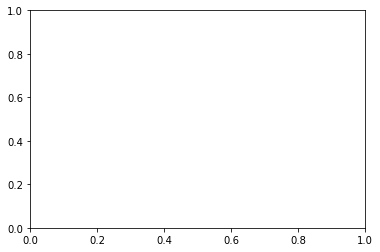

In [11]:
# 엘보우 기법 사용을 위한 벡터화

tfidf = TfidfVectorizer(min_df = 5)
text = [" ".join(nouns) for nouns in test_df['text_nouns']]
tfidf.fit(text)
vector = tfidf.transform(text).toarray()

sse2 = []
for i in tqdm(range(1,26)) :
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(vector)
    sse2.append(kmeans.inertia_)

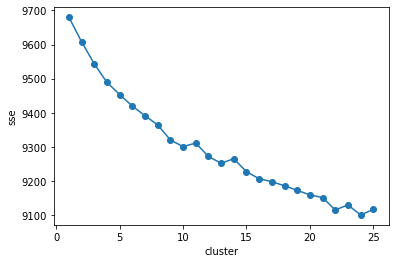

In [12]:
# 엘보우 기법 확인

plt.plot(range(1,26),sse2, marker='o')
plt.xlabel('cluster')
plt.ylabel('sse')
plt.show()

In [ ]:
# 10의 지점에서 꺾이는 경향으로 파악하여 10개의 clustering 진행

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0)
y = kmeans.fit_predict(vector)
test_df['label'] = y

In [ ]:
# 원본 파일 전처리

df['text_cleaned'] = df['text'].apply(text_clean)
df['text_cleaned'] = df['text_cleaned'].apply(stopwords_del)
df['text_cleaned'] = df['text_cleaned'].apply(list_to_str)

In [77]:
# 원본파일 명사추출
text_nouns_list = []
for text in tqdm(df['text_cleaned']): 
    text_nouns = kkma.nouns(str(text))
    text_nouns_list.append(text_nouns)

df['text_nouns'] = text_nouns_list

100%|██████████████████████████████████████████████████████████████████████████| 29041/29041 [3:11:58<00:00,  2.52it/s]


In [79]:
# test_df의 label 값 기존 데이터에 추가 (clustering df 내 불필요 항목 삭제 후 merge)
normal_df = pd.merge(left=df, right=test_df[['title','label']], how='left', on='title')
normal_df

,title,text,url,media,date,text_cleaned,text_nouns,label
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[이 땅 에서 비 정규직 이 라는 표현 이 광범위 하 게 쓰이 ㄴ 지 여년 정부 가...,"[땅, 비, 정규직, 이, 표현, 광, 광범위, 범위, 하, 지, 여년, 정부, 신...",5.0
1,일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\n노동의 미래를 모두 알 수는 없다. 다만 현실에서 일어나...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[일자리 보다 일거리 노동 의 미래 를 모두 알 ㄹ 수 는 없 다 다만 현실 에서 ...,"[일, 일자리, 자리, 일거리, 노동, 의, 미래, ㄹ, 수, 현실, 일어, 다양,...",NaN
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[일자리 보다 일거리 AI 학습 데이터 가공 기업 크 라 우 드웍스 교육장 참관 소...,"[일, 일자리, 자리, 일거리, 학습, 데이터, 가공, 기업, 우, 드웍스, 교육장...",5.0
3,"지혜씨, 지훈씨를 부탁해! [인포그래픽]",새로 태어나는 아이들은 줄어들고 어르신들은 계속 나이를 먹어 갑니다. 2020년 새...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[새로 태어나 는 아이 들 은 줄어들 고 어르신 들 은 계속 나이 를 먹 어 갈 ㅂ...,"[아이, 은, 고, 어르신, 나이, 먹, ㅂ, ㄴ, 새해, 도, 바, 을, 이, 정...",NaN
4,"[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”",새천년의 시작과 함께 세상에 나온 2000년대생들이 어느덧 사회 변화를 이끌 20대...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,[새 천년 의 시작 과 함께 세상 에 나오 ㄴ 년 대생 들 이 어느덧 사회 변화 를...,"[천년, 의, 시작, 과, 세상, 대생, 이, 사회, 변화, ㄹ, 대가, 년, 전후...",NaN
...,...,...,...,...,...,...,...,...
29083,"""2.5단계로 무급휴가 요구""… 코로나 재유행에 살아난 '갑질'",직장인 A씨는 수도권 사회적 거리두기 2.5단계를 시행하는 30일부터 다음달 6일...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,[직장인 A 씨 는 수도권 사회적 거리 두 기 단계 를 시행 하 는 일 부터 다음달...,"[직장인, 씨, 수도권, 사회적, 거리, 기, 단계, 시행, 하, 일, 다음달, 일...",NaN
29084,모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까,"30일 0시부터 서울 전역에 강화된 사회적 거리두기(2.5단계)가 시행됐지만, 전문...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,[일 시 부터 서울 전역 에 강화 되 ㄴ 사회적 거리 두 기 단계 가 아 시행 되 ...,"[시, 서울, 전역, 강화, ㄴ, 사회적, 거리, 기, 단계, 시행, 전문가, 은,...",NaN
29085,내일부터 서울 시내버스 밤 9시 이후 20% 감축… 주말 수준으로,수도권의 ‘사회적 거리두기’ 2.5단계 시행 기간에 맞춰 서울 시내버스의 야간 운행...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,[수도권 의 사회적 거리 두 기 단계 시행 기간 에 맞추 어 서울 시내 버스 의 야...,"[수도권, 의, 사회적, 거리, 기, 단계, 시행, 기간, 추, 서울, 시내, 버스...",NaN
29086,집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피,21일부터 10일째 무기한 집단휴진을 이어가고 있는 전공의(인턴ㆍ레지던트)들과 정부...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,[일 부터 일 째 무기 하 ㄴ 집단 휴진 을 잇 어 가 고 있 는 전공의 인턴 레지...,"[일, 무기, 하, ㄴ, 집단, 휴진, 을, 잇, 전공의, 인턴, 레지던트, 과, ...",5.0


In [94]:
# 합친 전처리 데이터 벡터화

tfidf = TfidfVectorizer()
normal_text = [" ".join(nouns) for nouns in normal_df['text_nouns']]
normal_vector = tfidf.fit_transform(normal_text)

In [ ]:
normal_df['vector'] = normal_vector

In [100]:
# label이 있는 값과 없는 값 분류
train_df = normal_df[normal_df['label'].notna()]
vali_df = normal_df[normal_df['label'].isna()]

In [95]:
normal_vector.shape

(29088, 45736)

In [98]:
normal_df['vector'] = normal_vector

In [101]:
train_df.head()

,title,text,url,media,date,text_cleaned,text_nouns,label,vector
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[이 땅 에서 비 정규직 이 라는 표현 이 광범위 하 게 쓰이 ㄴ 지 여년 정부 가...,"[땅, 비, 정규직, 이, 표현, 광, 광범위, 범위, 하, 지, 여년, 정부, 신...",5.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[일자리 보다 일거리 AI 학습 데이터 가공 기업 크 라 우 드웍스 교육장 참관 소...,"[일, 일자리, 자리, 일거리, 학습, 데이터, 가공, 기업, 우, 드웍스, 교육장...",5.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
5,"[포토] 인간과 로봇의 만남, 공존·번영의 새해 꿈꾸며…","미켈란젤로의 ‘천지창조’ 속 하나님과 아담처럼, 스티븐 스필버그의 ‘ET’ 속 소년...",https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,[미 켈 란 젤 로 의 천지 창조 속 하나님 과 아담 처 럼 스티븐 스피 ㄹ 버그 ...,"[미, 켈, 란, 젤, 로, 의, 천지, 창조, 속, 하나님, 과, 담, 처, 럼,...",5.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
6,[알림] 새해 국민일보 더욱 새로워집니다,국민일보가 2020년을 맞아 독자 여러분과 소통하고 공감할 연중기획을 시작합니다. ...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,[국민 일보 가 년 을 맞 아 독자 여러 분과 소통 하 고 공감 하 ㄹ 연중 기획 ...,"[국민, 일보, 을, 독자, 분과, 소통, 하, 공감, 하, ㄹ, 연중, 기획, 작...",5.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
8,"“누가 더 못하나” 답없는 여야, 불어난 산토끼가 승부 가른다",오는 4월 15일 치러지는 21대 총선은 한국의 정치 시간표상 매우 중요한 이벤트다...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,[오 는 월 일 치 러 지 는 대 총선 은 한국 의 정치 시간표 상 매우 중요 하 ...,"[오, 월, 일, 치, 러, 지, 대, 총선, 은, 한국, 의, 정치, 시간표, 상...",0.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."


In [102]:
vali_df.head()

,title,text,url,media,date,text_cleaned,text_nouns,label,vector
1,일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\n노동의 미래를 모두 알 수는 없다. 다만 현실에서 일어나...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[일자리 보다 일거리 노동 의 미래 를 모두 알 ㄹ 수 는 없 다 다만 현실 에서 ...,"[일, 일자리, 자리, 일거리, 노동, 의, 미래, ㄹ, 수, 현실, 일어, 다양,...",NaN,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
3,"지혜씨, 지훈씨를 부탁해! [인포그래픽]",새로 태어나는 아이들은 줄어들고 어르신들은 계속 나이를 먹어 갑니다. 2020년 새...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,[새로 태어나 는 아이 들 은 줄어들 고 어르신 들 은 계속 나이 를 먹 어 갈 ㅂ...,"[아이, 은, 고, 어르신, 나이, 먹, ㅂ, ㄴ, 새해, 도, 바, 을, 이, 정...",NaN,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
4,"[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”",새천년의 시작과 함께 세상에 나온 2000년대생들이 어느덧 사회 변화를 이끌 20대...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,[새 천년 의 시작 과 함께 세상 에 나오 ㄴ 년 대생 들 이 어느덧 사회 변화 를...,"[천년, 의, 시작, 과, 세상, 대생, 이, 사회, 변화, ㄹ, 대가, 년, 전후...",NaN,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
7,"트럼프는 ‘경제 호황’ 기대감, 민주당은 ‘트럼프 때리기’",오는 11월 3일 실시될 미국 대통령 선거의 승자를 지금 예상하기는 힘들다. 그러나...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,[오 는 월 일 실시 되 ㄹ 미국 대통령 선거 의 승자 를 지금 예상 하기는 힘들 ...,"[오, 월, 일, 실시, ㄹ, 미국, 대통령, 선거, 의, 승자, 지금, 예상, 힘...",NaN,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
9,"[20대 리포트] “없는 길 만드는 스타트업… 패기는 기본, 땀은 필수죠”",혁신기술기업의 지원 업체 본투글로벌이 펴낸 2018 대한민국 글로벌 창업백서에 따르...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,[혁신 기술 기업 의 지원 업체 보 ㄴ 투 글로벌 이 펴내 ㄴ 대한민국 글로벌 창업...,"[혁신, 기술, 기업, 의, 지원, 업체, 보, ㄴ, 투, 글로벌, 이, 내, 대한...",NaN,"(0, 5177)\t0.015782719715587343\n (0, 15008..."


In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10111 entries, 0 to 29087
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10111 non-null  object 
 1   text          10111 non-null  object 
 2   url           10111 non-null  object 
 3   media         10111 non-null  object 
 4   date          10111 non-null  object 
 5   text_cleaned  10111 non-null  object 
 6   text_nouns    10111 non-null  object 
 7   label         10111 non-null  float64
 8   vector        10111 non-null  object 
dtypes: float64(1), object(8)
memory usage: 789.9+ KB


In [104]:
vali_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18977 entries, 1 to 29085
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         18977 non-null  object 
 1   text          18977 non-null  object 
 2   url           18977 non-null  object 
 3   media         18977 non-null  object 
 4   date          18977 non-null  object 
 5   text_cleaned  18977 non-null  object 
 6   text_nouns    18977 non-null  object 
 7   label         0 non-null      float64
 8   vector        18977 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [112]:
train_x = normal_vector[normal_df[normal_df['label'].notna()].index]
train_y = train_df['label']

test_x = normal_vector[normal_df[normal_df['label'].isna()].index]

In [113]:
# label이 있는 데이터만 train

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5, random_state=0)
rfc.fit(train_x, train_y)

RandomForestClassifier(n_estimators=5, random_state=0)

In [119]:
# 테스트 값들 예측 및 예측값 입력

vali_df['label'] = rfc.predict(test_x)

<ipython-input-119-0fa6243be212>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df[normal_df['label'].isna()]['label'] = rfc.predict(test_x)


In [144]:
last_df = pd.concat([train_df,vali_df],axis=0)

<AxesSubplot:>

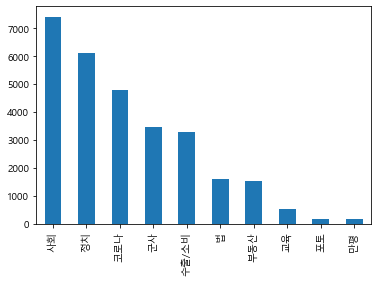

In [247]:
last_df['label_name'].value_counts().plot.bar()

In [248]:
last_df['label_name'].value_counts()

사회       7412
정치       6128
코로나      4800
군사       3473
수출/소비    3293
법        1607
부동산      1522
교육        520
포토        175
만평        158
Name: label_name, dtype: int64

In [175]:
last_df[last_df['label']==9]

,title,text,url,media,date,text_cleaned,text_nouns,label,vector
33,입 뗀 윤석열 “돈·권력으로 국민 선택 왜곡 땐 엄정 대응”,[서울신문]\n尹총장 신년사서 공수처 관련 입장 없어 \n즉시 통보 조항·野 실질 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-01-01,[서울 신문 총장 신년 사서 공수 처 관련 입장 없 어 즉시 통보 조항 실질 비토 ...,"[서울, 신문, 총장, 신년, 사서, 공수, 처, 관련, 입장, 즉시, 통보, 조항...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
50,"""부산의료원장, 조국 딸 장학금 주며 병원장직 인사 청탁""","검찰, 12개 혐의로 조국 기소\n\n\n\n조국 전 법무부 장관이 31일 뇌물 수...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-01-01,[검찰 개 혐의 로 조국 기소 조국 전 법무부 장관 이 일 뇌물 수수 등 가지 혐의...,"[검찰, 개, 혐의, 로, 조국, 기소, 전, 법무부, 장관, 일, 뇌물, 수수, ...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
81,검찰 “조국 민정수석 때 후배 최강욱에 아들 허위 인턴 증명서 부탁”,법무법인 근무 2017년 증명서 발급… 이후 민정수석실 발탁\n\n아들 입시 활용 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01,[법무 법인 근무 년 증명서 발급 이후 민정 수석실 발탁 아들 입시 활용 위해 기간...,"[법무, 법인, 근무, 년, 증명서, 발급, 이후, 민정, 수석실, 발탁, 아들, ...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
118,文 “권력기관 개혁 계속… 대통령권한 다할 것”,文대통령 商議 신년인사 \n\n檢개혁 강력 드라이브 천명 \n\n“상생 도약 위해...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-01-02,[대통령 신년 인사 개혁 강력 드라이브 천명 상생 도약 위 하 어 경제 혁신 문 재...,"[대통령, 신년, 인사, 개혁, 강력, 드라이브, 천명, 상생, 도약, 위, 하, ...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
130,"<文 ‘檢 개혁’ 강력 드라이브>秋 초고속 임명한 文, ‘대통령 권한’ 거론하며 檢...",- 신년인사서 “권력기관 개혁”\n\n“법·제도 개혁 멈추지 않을 것”\n\n밀어붙...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-01-02,[신년 인사 서 권력 기관 개혁 법 제도 개혁 멈추 지 않 을 것 믿 어 붙이 기 ...,"[신년, 인사, 권력, 기관, 개혁, 법, 제도, 추, 지, 을, 식, 검찰, 예고...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
...,...,...,...,...,...,...,...,...,...
28513,기업 살려달라는데 규제법 더 옥죈 정부,신종 코로나바이러스 감염증(코로나19)의 재확산으로 경제에 ‘비상등’이 켜진 가운데...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-08-26,[신종 코로나 바 이러스 감염증 코로나 의 재 확산 으로 경제 에 비상 등 이 켜지...,"[신, 신종, 종, 코로나, 바, 러스, 감염증, 의, 재, 확산, 경제, 비상, ...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
28728,“尹총장 의견 이번에도 거의 반영 안돼”… 권력 수사한 검사들 좌천성 지방 발령,“이제 ‘윤석열 검찰총장 사단’은 완전히 해체됐다고 말해도 된다.”\n\n 27일 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-08-28,[이제 윤 석 열 ㄹ 검찰 총장 사단 은 완전히 해체 되 었 다고 말하 어도 되 ㄴ...,"[윤, 석, ㄹ, 검찰, 총장, 사단, 은, 해체, 말, 어도, 일, 단행, ㄴ, ...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
28752,호남·추미애·이성윤 라인 전진배치…“권력수사는 끝났다”,이성윤과 기독교 모임 형진휘\n\n윤석열 장모 기소한 최성필 등\n\n중앙지검 요직...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-28,[이성 윤 과 기독교 모임 형 진 휘 윤 석 열 ㄹ 장모 기소 하 ㄴ 최성 필 등 ...,"[이성, 윤, 과, 기독교, 모임, 형, 진, 석, ㄹ, 장모, 기소, 하, ㄴ, ...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."
28777,“‘사단’ 사라져야 한다”더니… 추미애·이성윤 사단 檢 내 요직 차지,"檢 중간간부·평검사 인사 단행 \n‘한동훈과 몸싸움’ 정진웅, 차장검사로 승진\n\...",https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-08-28,[중간 간부 평검사 인사 단행 한동 훈 과 몸싸움 정진 웅 차장 검사 로 승진 추미...,"[중간, 간부, 평검사, 인사, 단행, 한동, 훈, 과, 몸싸움, 정진, 웅, 차장...",9.0,"(0, 5177)\t0.015782719715587343\n (0, 15008..."


In [234]:
categorical = {0:'정치', 1:'군사', 2:'수출/소비', 3:'코로나', 4:'만평', 5:'사회', \
               6:'포토', 7:'부동산', 8:'교육', 9:'법'}

In [ ]:
ㅣㄴㅅ

In [177]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [185]:
te = TransactionEncoder()
te_result = te.fit(last_df[last_df['label']==3]['text_nouns']).transform(last_df[last_df['label']==3]['text_nouns'])

In [179]:
for i in te.columns_:
    print(i)

cc
cp
mm
ms
no
vo
ㄱ
ㄱ으
ㄱ이
ㄴ
ㄴ가요
ㄴ가지
ㄴ다
ㄴ다며
ㄴ단
ㄴ대
ㄴ데
ㄴ바
ㄴ지
ㄷ
ㄹ
ㄹ걸
ㄹ게
ㄹ게요
ㄹ까
ㄹ까요
ㄹ꼬
ㄹ는지
ㄹ라
ㄹ라고
ㄹ라요
ㄹ락
ㄹ래
ㄹ러라
ㄹ련
ㄹ망
ㄹ망정
ㄹ뿐
ㄹ뿐더러
ㄹ새
ㄹ세라
ㄹ수록
ㄹ지
ㄹ지나
ㄹ지라
ㄹ지어다
ㄹ지언
ㄹ지언정
ㄹ진대
ㅁ
ㅁ니다
ㅁ에도
ㅂ
ㅂ니까
ㅂ니다
ㅂ디
ㅂ디다
ㅂ쇼
ㅂ시
ㅂ시다
ㅂ시오
ㅅ
ㅇ
ㅈ
ㅉ
ㅉㅉ
ㅊ
ㅋ
ㅋ사
ㅍ
ㅎ
ㅐ
ㅓ
ㅓ모음
ㅜ
ㅜ모음
ㅠ
ㅣ
ㅣ프
가가
가가린
가감
가거
가건물
가검물
가게
가겠
가격
가격대
가격제
가격차
가격표
가결
가경
가경동
가계
가계부
가계비
가계소득도
가계약
가계정
가곡
가공
가공물
가공업
가공품
가과
가관
가교
가구
가구용
가구주
가권
가극단
가금
가급
가급적
가기
가까울수록
가까워졌다는
가까웠던
가까이
가꾸기
가나
가나다
가난
가냐
가늠
가늠자
가늠했다
가능
가능성
가닥
가담
가담자
가덕
가덕도
가도
가독성
가동
가동률
가두
가두리
가드
가드너
가드레일
가든
가락
가락동
가락지
가란
가람
가래
가래떡
가래를
가랭이
가량
가려움
가려움증
가로
가로등
가로막
가로세로
가로수
가로젓
가로지
가로지르
가로채
가루
가루약
가르
가르기
가르마
가르침
가름
가리
가리개
가리기
가리봉
가리봉동
가리비
가리아
가림
가마
가마니
가마솥
가만두지
가망
가망성
가매장
가맹
가맹점
가면
가명
가목
가무
가문
가문비
가뭄
가뭄이
가미
가발
가방
가버
가버리
가벌
가법
가벼운
가변
가변적
가볍
가보
가본
가본적
가봉
가부
가부장
가불
가브
가빈
가사
가사리
가산
가산동
가산면
가산세
가산점
가삼
가상
가상공간
가상적
가상현실
가석방
가선
가설
가설물
가성
가세
가속
가속기
가속도
가속화
가솔린
가수
가수요
가스
가스관
가스레인지
가스밸브
가스실
가스전
가스총
가스통
가슴
가슴만
가슴속
가슴팍
가습
가습기
가시
가시거리
가시권
가시나
가시나무
가시라
가시밭
가시밭길
가시복
가시화
가시화되
가식
가신
가십
가쓰
가쓰히
가안
가압
가압류
가액
가액의
가야
가야고
가야산


금빛
금산
금산군
금산읍
금상
금상첨화
금새
금색
금생
금서
금섭
금성
금성면
금세
금세기
금속
금속활자
금수
금숙
금슬
금시
금식
금신
금실
금싸라기
금암
금암동
금액
금액인
금양
금언
금없
금연
금연법
금오
금오동
금옥
금왕
금왕읍
금요
금요일
금요일엔
금욕
금용
금원
금융
금융가
금융계
금융권
금융당국은
금융론
금융사
금융시장
금융업
금융위기하에
금융인
금융채
금융클러스터
금융통
금은
금은방
금의
금인
금일
금일봉
금자탑
금장
금전
금정
금정구
금정면
금제
금조
금족령
금주
금줄
금지
금지령
금지면
금지법
금지선
금쪽같
금채
금천
금천구
금촌
금촌동
금치산
금탑
금태
금태섭
금통위
금품
금하
금형
금호
금호동
금혼
금화하
금환
금후
금희
급
급가
급감
급강하
급격
급격히
급경
급경사
급과
급구
급급
급기
급도
급등
급등세
급등한
급락
급락세
급락한
급락한다
급락했다
급랭
급류
급류가
급만
급매
급매물
급박
급변
급변했다
급병
급보
급부
급부상
급사
급상승
급선무
급선회
급성
급성장
급소
급속
급속도
급수
급수관
급수탑
급습
급식
급식비
급식소
급식실
급여
급여금
급여량
급여액
급우
급유
급유기
급인
급작
급작스럽
급전
급전환
급정거
급제
급제동
급조
급증
급증한다
급증했다
급지
급진
급진적
급진전
급차
급체
급파
급행
급행료
급히
긍
긍정
긍정성
긍정적
긍지
기
기가
기각
기간
기간에
기갑
기강
기개
기거
기겁
기경
기계
기계공
기계식
기계실
기계음
기계적
기계화
기고
기고가
기고문
기고자
기공사
기공식
기관
기관사
기관실
기관장
기관지
기관지염
기관차
기관총
기관포
기교
기교파
기구
기권
기근
기금
기금법
기기
기남
기내
기내식
기네스
기네스북
기념
기념관
기념물
기념비
기념사
기념사업
기념사진
기념시계
기념식
기념식수
기념일
기념장
기념절
기념탑
기념패
기념품
기념행사
기념회
기능
기능도
기능사
기능성
기능인
기능장
기능적
기니
기다렸다
기다리
기단
기대
기대감
기대는
기대된다
기대어
기대치
기대한다
기대했다
기댓값
기덕
기도
기도문
기도서
기도원
기

데모
데믹
데베
데뷔
데뷔작
데스
데스방크
데스크
데스크톱
데스킹
데시
데시벨
데쓰
데없
데우
데유
데이
데이비
데이비스
데이지
데이타
데이터
데이터베이스
데이트
데이팅
데이팅앱으
데일리
데일리서프라이즈
데자뷔
데치
데크
데탕트
데프콘
덱사메타손
덱스
덴마크
덴버
덴트
델타
뎅기열
뎐
뎬
도
도가
도가니
도감
도강
도개
도경
도계
도계읍
도고
도곡
도곡동
도공
도과
도광
도구
도구적
도구함
도군
도규
도그마
도금
도급
도급인
도깨비
도끼
도끼질
도난
도남
도남동
도내
도너츠
도널드
도넛
도농
도농동
도뇨
도달
도달했을
도당
도덕
도덕률
도덕성
도덕심
도덕적
도덕주의
도데카이
도돌이
도두
도두동
도둑
도둑고양이
도둑놈
도둑맞
도둑질
도둑질하
도들이
도라지
도랑
도래
도래액의
도래지
도래했다
도량
도련
도련님
도렴
도렴동
도령
도로
도로망
도로변
도록
도료
도룡
도룡동
도루묵
도르
도르래
도르트문트
도르프
도리
도리스
도리아
도림
도림천
도립
도마
도마뱀
도막
도망
도망가
도망자
도망쳤다
도망치
도매
도매가
도매금
도매상
도매업
도매점
도메인
도면
도모
도미
도미노
도미사쿠
도민
도민증
도민회
도밍고
도박
도박꾼
도박장
도박판
도발
도발성
도발자
도발적
도배
도보
도봉
도봉구
도봉산
도부
도브
도비
도사
도사리
도산
도살
도살장
도상
도상국
도색
도생
도서
도서관
도선
도선동
도선사
도성
도소
도수
도스
도스토옙스키
도시
도시가스
도시락
도시락을
도시민
도시바
도시인
도시형
도시화
도식
도식적
도식화
도심
도심지
도심형
도안
도야
도야마
도약
도약대
도어
도어록
도에
도열
도영
도예
도예가
도와
도와주
도외
도외시
도요
도용
도우미
도울
도움
도움말
도원
도의
도의원
도의적
도의회
도이
도이체방크
도이치
도인
도일
도입
도입된다
도입률은
도입부
도입선
도입으로
도입은
도자
도자기
도장
도장공
도장을
도적
도적놈
도전
도전자
도전장
도전적
도전하겠다
도정
도정기
도제
도조
도조신
도조제
도주
도주로
도주자
도중
도지
도지사
도착
도착증
도착지
도착했다
도처
도척
도

명언
명연
명연기
명예
명예직
명예퇴직
명예형
명오
명왕성
명운
명월
명으로
명을
명의
명의자
명이
명인
명일
명일동
명자
명작
명재
명저
명전
명절
명절날
명제
명조
명종
명주
명줄
명중
명중률
명지
명진
명징
명찰
명창
명철
명치
명칭
명탐정
명태
명태회
명패
명품
명품업체
명한
명함
명함판
명해
명현
명호
명화
명확성
명환
명훈
명희
몇
몇몇
몐
모
모가
모가면
모가지
모건
모계
모골
모공
모교
모국
모국어
모군
모규
모금
모금액의
모기
모기업
모기장
모기지
모나리자
모나코
모낭염
모내기
모너
모너핸
모네이
모녀
모노
모노머
모니카
모니터
모니터링
모님
모닝
모닝콜
모닥불
모당
모더니스트
모더니즘
모더니티
모던
모델
모델링
모뎀
모도
모독
모두
모둠
모듈
모드
모든
모듬
모라
모란
모란봉
모란장
모랄레스
모래
모래벽
모래성
모래주머니
모래층
모래흙
모략
모럴
모레
모로코
모루
모르
모르는
모르몬
모르쇠
모르쟎
모르핀
모른다
모름
모리
모리셔스
모리스
모리슨
모리츠
모린
모만
모멘텀
모면
모멸
모멸감
모바일
모바일앱
모발
모방
모방성
모범
모범생
모범적
모법
모병
모병원
모비스
모빌
모사
모사드
모색
모서리
모성
모세
모세포
모세혈관
모션
모셨다
모수
모순
모순성
모순적
모순점
모스
모스크
모습
모시
모시겠다
모신
모씨
모아
모악산
모야
모양
모양새
모어
모없
모였다
모와
모욕
모욕감
모욕적
모욕죄
모유
모으
모음
모음곡
모음집
모의
모의고사
모이
모인
모일
모임
모자
모자라
모자란다
모자람
모자랐다
모자르
모자반
모자이크
모작
모전
모정
모조
모조리
모조품
모족
모종
모즈간
모지
모직
모진
모집
모집단
모집법
모집인
모집책
모창
모처
모체
모측
모친
모친상
모태
모택동
모터
모터쇼
모터스
모테
모텔
모토
모퉁이
모트
모티브
모티프
모판
모포
모피
모필
모하
모한
모함
모항
모해
모험
모험가
모험심
모험적
모형
모형화
모호
모호성
모회사
목
목가
목감기
목걸이
목검
목격
목격담
목격됐다
목격자
목격했다
목계
목공
목과
목구멍
목덜미
목도
목도리
목돈
목동


복잡성
복잡화
복장
복적
복절
복정
복제
복제물
복제약
복제품
복종
복주
복지
복지과
복지관
복지법
복지부
복지사
복지원
복지의
복지회
복직
복진
복창
복철
복토
복통
복판
복하
복학
복학생
복합
복합적
복합체
복협
복호
복희
볶음
볶음밥
본
본가
본거
본거지
본건
본격
본격적
본격적인
본격화
본계약
본고
본고장
본과
본관
본교
본국
본권
본궤도
본기
본능
본능적
본다
본당
본데
본도
본동
본드
본디
본뜻
본래
본령
본론
본류
본리
본말
본명
본무
본무대
본문
본바탕
본방
본법
본보
본보기
본부
본부인
본부장
본분
본사
본산
본색
본선
본성
본심
본안
본업
본연
본영
본예산
본오
본오동
본원
본원적
본위
본의
본인
본인에게
본인이
본적
본적지
본전
본점
본죄
본지
본진
본질
본질적
본처
본청
본체
본태
본태성
본토
본토인
본향
본형
본회
본회의
볼
볼가강
볼거리
볼더
볼드
볼드윈
볼로냐
볼륨
볼링
볼링장
볼만
볼메
볼멘소리
볼모
볼셰비키
볼썽
볼음도
볼일
볼트
볼펜
볼품
봄
봄가을
봄기운
봄꽃
봄날
봄날씨
봄맞이
봄바람
봄방학
봄배추
봄볕
봄보리
봄비
봄철
봅서
봅슬레이
봅시
봇
봇물
봇으
봇짐
봉
봉건
봉건적
봉고
봉고차
봉공
봉과
봉급
봉급생활자
봉기
봉납
봉대
봉덕
봉덕동
봉독
봉동
봉래
봉래동
봉로
봉림
봉만
봉명
봉명동
봉무
봉무동
봉바르디
봉변
봉분
봉사
봉사단
봉사료
봉사원
봉사자
봉사활동을
봉사회
봉산
봉상
봉서
봉선
봉선동
봉송
봉쇄
봉쇄령
봉쇄망
봉쇄선
봉수
봉숙
봉숭아
봉신
봉안
봉애
봉양
봉양읍
봉역
봉오동
봉우리
봉이냐
봉인
봉장
봉정
봉제
봉죽
봉지
봉지희씨
봉직
봉착
봉착했다
봉창
봉천
봉천군관학교를
봉천동
봉축
봉토
봉투
봉평
봉평면
봉합
봉행
봉헌
봉호
봉화
봉화군
봉화산
봉환
봉황
봐라
봐야
봐야겠다
봐야죠
봤느냐
봤는데
봤다
봤더니
봤던
봤어도
봤자
뵀다
뵙겠다
부
부가
부가세
부각
부강
부걸루
부검
부결
부경
부계
부고
부고란
부곡
부과
부과금
부과액
부과한다
부관
부교
부교수
부교재
부국
부국장
부군
부권
부귀
부근
부금


선도
선도적
선동
선동가
선동원
선동이
선동자
선동적
선되
선두
선두권
선란
선량
선례
선로
선릉로
선릉역
선릉역점
선린
선망
선매
선명
선명도
선무
선무당
선문
선문답
선물
선물환
선미
선민
선바위
선박
선반
선발
선발대
선발자
선발전
선방
선배
선별
선별기
선별진료소나
선별진료소로
선보
선보이
선복
선봉
선봉장
선부
선불
선비
선사
선산
선상
선생
선생님
선서
선서식
선선
선수
선수권
선수금
선수단
선수상
선수촌
선숙
선순위
선술집
선스
선승
선시
선신
선실
선심
선아
선악
선양
선언
선언문
선언서
선언식
선열
선영
선외
선용
선우
선운
선원
선원면
선유
선유도
선율
선의
선이자
선인
선인도
선인장
선일
선임
선임권
선임기자
선임연구위원은
선임자
선임제
선입
선입견
선입관
선입선출
선자
선장
선재
선적
선전
선전관
선전물
선전원
선전전
선점
선정
선정릉
선정적
선정주의
선정했다
선제
선제공격
선조
선종
선주
선지
선지자
선진
선진국
선진적
선진화
선집
선차
선착
선착순
선착장
선창
선처
선천
선천성
선천적
선체
선출
선출하며
선출하면서
선취
선친
선태
선택
선택과
선택권
선택도
선택적
선택지
선택형
선탠
선팅
선포
선포문
선폭
선표
선풍
선풍기
선풍적
선하
선학
선학동
선한
선행
선현
선형
선호
선호도
선호한다
선화
선화동
선회
선후
선후배
선희
선희씨
섣
섣달
섣부르
설
설가
설거지
설겆이
설계
설계대
설계도
설계사
설계서
설계자
설과
설교
설교자
설국
설날
설도
설득
설득력
설득하고
설득한
설득해야
설득했지만
설량
설렁탕
설레
설레기
설레발
설로
설리번
설립
설립은
설립자
설맞이
설명
설명도
설명문
설명서
설명회
설문
설문지
설물
설법
설복
설비
설빈
설사
설사약
설상
설상가상
설악산
설압
설영
설왕설래
설욕
설욕전
설움
설원
설을
설의
설이
설인
설전
설정
설정자
설주
설중
설진
설치
설치가
설치류
설치를
설치물
설치법
설치안
설치에
설치한다
설탕
설트
설파
설해
설화
설희
섬
섬광
섬나라
섬도
섬뜩하
섬망
섬멸
섬세
섬유
섬유증
섬인
섬진
섬진강
섭

쏟아붓
쏟아졌다
쏟았
쏠린다
쏭
쏴댔다
쐈다
쐐기
쐬주
쑈
쑤시개
쑤이
쑤이저우
쑤저우
쑤전
쑤하
쑥
쑥대밭
쑥덕대
쑥스
쑥스럽
쑹
쑹씨
쓰겠느냐
쓰겠다
쓰기
쓰기는
쓰나미
쓰느냐
쓰느냐도
쓰는데
쓰다
쓰디
쓰라
쓰라림
쓰래
쓰럽
쓰레기
쓰레기봉지
쓰레기장
쓰레기통
쓰레받기
쓰루오카시
쓰리
쓰리잡
쓰모
쓰바
쓰샤
쓰시마
쓰쓰
쓰였다
쓰요
쓰임
쓰임새
쓰잘
쓰촨
쓰촨성
쓰카
쓰히
쓴
쓴다
쓴맛
쓴웃음
쓴잔
쓸
쓸개
쓸개즙
쓸데
쓸모
씀씀이
씀하
씨
씨가
씨네
씨는
씨도
씨름
씨받이
씨아
씨앗
씨와
씨월드
씨젠
씨족
씨줄
씨큐어넷
씨티
씬
씹새끼
씽
씽씽이
씽크
아
아가
아가리
아가씨
아가타
아가페
아고라
아고산
아과
아교
아구
아국
아군
아궁이
아귀
아귀다툼
아그레망
아기
아까
아까시
아깝다
아끼
아끼겠다
아나운서
아나키즘
아낙
아날로그
아남
아내
아넣
아네스
아노
아노미
아누켓호
아느냐
아니냐
아니다
아니라
아니랑
아니마
아니스
아니잖느냐
아도
아동
아동복
아동용
아동학
아드
아드님
아드리
아듣
아들
아들딸
아들러
아디다스
아디티
아라
아라고
아라동
아라비
아라비아
아라크
아란야
아람
아랍
아랍국
아랍권
아랍어
아랍인
아랑곳
아래
아래아
아래위
아래쪽
아래층
아랫니
아랫도리
아랫마을
아랫면
아랫부분
아랫사람
아랫선
아랫자리
아랫장
아랫집
아량
아레나
아레스
아렌트
아령
아로마
아론
아류
아르
아르곤
아르기닌
아르노
아르디
아르바이트
아르빌
아르코
아르테
아름
아름다움
아름답
아름드리
아리
아리랑
아리송
아리수
아리아
아리타
아린
아릴
아마
아마존
아마추어
아먹
아메리카
아메리칸
아멘
아모
아모레
아몬드
아무
아무개
아무것
아무르
아무말
아무짝
아미
아미노산
아미드
아미아
아미타
아민
아바
아바스
아바이
아바즈
아반
아방궁
아버
아버님
아버지
아베
아벨
아보
아부
아부지
아붙이
아브
아브로라
아비
아비장
아빠
아사
아사달
아사자
아산
아산시
아산화
아상
아서
아성
아세
아세아
아세안
아세톤
아소
아속
아수라
아수라장
아순
아쉬움
아쉽다
아스만
아스팔트
아스피
아

완역
완이
완장
완저
완전
완전수
완전체
완전히
완제
완제품
완주
완주군
완준
완충
완충재
완치
완쾌
완패
완행열차
완화
완화제
완화책
왈가왈부
왈드
왈라비
왈츠
왈패
왓
왓슨스
왓챠
왓츠앱
왔겠느냐
왔냐
왔느냐
왔능
왔다
왔수
왔심
왔어도
왔었
왔었다
왕
왕개미
왕건
왕과
왕관
왕국
왕궁
왕권
왕길
왕길동
왕당파
왕도
왕따
왕래
왕릉
왕림
왕립
왕모
왕복
왕산
왕성
왕세자
왕세제
왕숙
왕숙천
왕신
왕실
왕십리
왕양
왕왕
왕위
왕의
왕인
왕자
왕장
왕정
왕조
왕족
왕좌
왕중왕
왕진
왕징
왕징면
왕캉
왕후
왕훙
왜
왜건
왜곡
왜관
왜관읍
왜구
왜란
왜철쭉
왝
외
외가
외가댁
외각
외감
외갓집
외견
외견상
외계
외계인
외고
외곡
외골격
외골수
외과
외과의
외곽
외관
외관상
외교
외교가
외교관
외교단
외교라인
외교부
외교사
외교상
외교술
외교원
외교적
외교전
외교채널
외교통
외국
외국계
외국산
외국선
외국어
외국인
외국환
외근
외기
외길
외눈
외다리
외대
외도
외동
외동딸
외등
외랑
외래
외래종
외레브로
외로움
외마디
외면
외모
외무
외무부
외무상
외무성
외박
외방
외벽
외보
외부
외부로
외부인
외부적
외빈
외사
외사부
외삼촌
외상
외생
외설
외세
외손녀
외손자
외손주
외숙
외식
외식업
외신
외아들
외압
외야
외야수
외양
외양간
외에
외여
외여행
외연
외우
외유
외의
외이
외인
외자
외장
외장재
외적
외전
외제
외조
외조모
외조부
외조카
외종
외주
외줄
외지
외지인
외채
외쳤다
외출
외출자
외출증
외치
외침
외톨
외톨이
외통
외통수
외투
외풍
외피
외한
외할머니
외할아버지
외항
외향
외형
외형도
외화
외환
외환위기
외환위기설까지
외환죄
왼발
왼뺨
왼손
왼손잡이
왼쪽
왼쪽에서
왼팔
왼편
요
요가
요강
요거트
요건
요격
요격기
요격미사일
요결
요골
요구
요구권
요구량
요구르트
요구불
요구사항
요구서
요구액
요구한다
요금
요기
요나라
요동
요라
요란
요람
요량
요령
요로
요르단
요리
요리를
요리법
요리사
요리집
요망
요바린다
요받
요법
요사
요새
요섭
요셉
요셉씨
요셉의

입고
입고도
입고량
입관
입교
입구
입구까지
입국
입국했다
입금
입길
입김
입꼬리
입단
입담
입당
입대
입덧
입도
입력
입막음
입말
입맛
입맞춤
입매
입문
입문서
입바르
입방아
입버릇
입법
입법권
입법례
입법부
입법안
입법자
입법학
입법화
입법화되
입법화하
입부하
입북
입사
입산
입상
입상자
입석
입선
입성
입소
입소문
입소스
입소자
입소할
입속
입수
입수한다
입수했다
입술
입시
입식
입신
입실
입실론
입씨름
입안
입안자
입양
입양아
입어
입었다
입영
입욕
입원
입원비
입원실
입원을
입원했다
입이
입자
입자성
입장
입장객
입장권
입장료
입장이고
입장이었
입적
입점업체들에
입정
입주
입주권
입주민
입주자
입주한다
입증
입증됐다
입증하겠다
입증한다
입증했다
입지
입지전
입직
입찰
입찰금액의
입찰서
입찰일
입찰제
입천장
입체
입체적
입춘
입출
입출금
입하
입학
입학금
입학생
입학시험
입학식
입학자
입항
입헌
입혔다
입회
입회권
입회인
입후보
입후보자
입히
잇
잇는다
잇몸
잇섯
잇속
잇츠
잇츠스킨
잇페이씨
있거나
있거라
있겠냐
있겠느냐
있고
있기
있기도
있기에는
있께
있나
있냐
있냔
있느
있느냐
있는
있는데
있는데도
있는데요
있는지
있다
있다가
있다고
있다는
있다며
있더라
있던
있사
있사오
있어
있었
있었겠냐
있었고
있었노
있었느냐
있었는데
있었는지
있었다
있었던
있었으
있었으면
있으
있으니
있으라
있으라고
있으면
있으시냐
있을
있음
있잖
있쟎
있지
있지만
있짜
잉곳
잉글리시
잉어
잉여
잉여금
잉크
잉태
잊어버
잊어버리
잎
잎눈
잎사귀
잎줄기
잎집
자
자가
자가격리앱
자가격리앱만으
자가격리앱으
자가용
자가진단앱
자각
자간
자갈
자갈길
자갈치
자강
자강도
자개
자객
자거
자격
자격시험
자격자
자격증
자격지심
자결
자경
자경단
자계
자고새
자곡
자곡동
자공
자괴
자괴감
자구
자구책
자국
자국민
자국인
자궁
자극
자극적
자극제
자금
자금난
자금력
자금성
자금원
자금줄
자급
자급률
자급자족
자긍
자긍심
자기
자기계
자기관리
자기도
자기반
자기반성
자기소개
자기앞
자기애
자기

중수본
중수부
중순
중순쯤
중시
중시하
중식
중신
중신종
중심
중심가
중심국
중심권
중심부
중심성
중심으로
중심이냐
중심인물
중심적
중심제
중심주의
중심지
중심축
중씨
중압감
중앙
중앙값
중앙당
중앙대
중앙동
중앙방역대책본부
중앙부
중앙선
중앙위
중앙은행
중앙일보
중앙재난안전대책
중앙재난안전대책본부
중앙정보부
중앙지
중앙지검
중앙청
중앙회
중양
중역
중연
중엽
중영도
중외
중요
중요도
중요성
중요시
중용
중원
중원구
중웨이
중위
중위도
중위소
중유
중유럽
중은
중의
중의원
중이
중인
중임
중장
중장기
중장비
중재
중재국
중재법
중재자
중절
중점
중점적
중정
중조
중졸
중죄
중죄인
중주
중증
중증도
중증환자만
중지
중지도
중지하
중지했다
중진
중진국
중질유
중징
중징계
중책
중천
중첩
중청
중초
중촌
중촌동
중추
중추적
중축
중층
중치
중태
중태도
중턱
중통
중퇴
중파
중편
중평
중폭
중품
중하
중학
중학교
중학동
중학생
중한
중함
중합
중핵
중핵적
중형
중혼죄
중화
중화기
중화동
중화상
중화인
중화제
중화학
중환
중환자
중환자실
중후
중후반
중흥
중희
줘버렸다
줘야
줬다
줬었다
줴
쥐
쥐고기
쥐꼬리
쥐띠
쥐락펴락했다
쥐벼룩
쥐새끼
쥐어뜯
쥐여지
쥐잡기
쥐죽
쥐트
쥬
쥴
즈
즈닝
즈밍
즈뱃
즈버
즈벡
즈워스
즈워티
즈웨
즈융
즈음
즈젠
즈펠드
즈히
즉각
즉각적
즉결
즉답
즉발
즉사
즉석
즉석밥과
즉시
즉위
즉위식
즉응
즉효
즉흥
즉흥적
즌
즌스
즐
즐거움
즘
즙
증
증가
증가량
증가분
증가분이
증가세
증가액
증가율
증가했다
증감
증강
증강제
증거
증거금
증거물
증거인
증과
증권
증권가
증권계
증권사
증권업
증기
증대
증대됐다
증류수
증명
증명력
증명서
증명하겠다
증명했다
증발
증발량
증발산
증발산량
증보판
증빙
증산
증산교
증상
증상만
증상이
증서
증설
증세
증손
증손자
증시
증식
증식되는
증액
증언
증언대
증여
증여세
증오
증오심
증원
증원하기는
증인
증인석
증자
증정
증조
증진
증차
증축
증파
증편
증평
증평읍
증폭
증폭기
증표
증후
증후군
지
지가
지각
지

쿠알
쿠알라룸푸르
쿠에
쿠엔
쿠열
쿠웨
쿠웨이트
쿠이
쿠치
쿠치넬
쿠친
쿠쿠
쿠크
쿠키
쿠킹
쿠타
쿠타자르
쿠터
쿠테타
쿠팡
쿠팡맨
쿠팡으
쿠팡이츠
쿠팡친구
쿠팡페
쿠퍼
쿠폰
쿤밍
쿨링
쿱먼
쿼드
쿼터
쿼터백
쿼터제
퀀
퀀텀스
퀄
퀄리티
퀄컴
퀑
퀘
퀘르세
퀘벡
퀘벡주
퀘스
퀘스트
퀜
퀴
퀴즈
퀴티리서치
퀵팩트세트
퀸
퀸벨호텔
퀸스
퀸즈
퀼
퀼트
큐
큐레이터
큐브
큐비즘
큐빅
큘
큘러스
크가
크기
크까
크다
크단
크라시
크라우드웍스
크라운
크라이슬러
크라크
크래
크래들
크래커
크래프
크래프트
크래프트하인즈
크랙
크랩
크랫
크랭크
크럼프
크럽
크레
크레디트
크레딧
크레딧잡
크레모
크레스트
크레용
크레이
크레이터
크레인
크레타
크레파스
크렘린
크로
크로나
크로네
크로바
크로스
크로스보팅
크로스오버
크로아티아
크로우법
크로즈
크로프트
크롤링
크롬
크루
크루그먼
크루드
크루스
크루스테스
크루아
크루즈
크르
크를
크리
크리머
크리슈
크리스
크리스마스
크리스마스이브
크리스마스트리
크리스찬
크리스천
크리스탈
크리스털
크리스트
크리오
크릭
크린
크린텍
크림
크립
크먼
크몽
크바
크버
크비
크샤
크스
크시
크에
크와
크의
크코
크트
크푸
크푸르
크호버
크홀츠
큰
큰길
큰길가
큰나무
큰놈
큰누나
큰돈
큰딸
큰마음
큰맘
큰물
큰박쥐
큰방
큰불
큰비
큰상
큰소리
큰손
큰스님
큰아들
큰아버지
큰아이
큰애
큰언니
큰오빠
큰일
큰절
큰조카
큰집
큰처남
큰형
클라
클라리넷
클라쓰
클라우드
클라이맥스
클라이밍
클라이언트
클라인
클라크
클람
클래
클래스
클래스팅
클래식
클러스터
클럽
클레어
클레이
클레임
클로로
클로로퀸
클로버
클로스
클로에
클로즈업
클롭
클리너
클리닉
클리어
클리퍼
클리프
클릭
클린
클린턴
클립
큼스
키
키나
키네틱
키느냐
키다리
키드
키르쿠크
키보드
키부츠
키스
키스신
키어
키예프
키오스
키우
키우겠다
키운다
키워드
키웠다
키즈
키친
키토
키트
키퍼
키포룩
키프로스
키핑
킥
킥보드
킨스
킨트
킬러
킬로그램
킬로미터
킬로바이트
킬로와트
킬로와트시
킬로톤
킴벌리
킴스
킵스
킵

합선
합성
합성고무
합성물
합성어
합세
합수
합숙
합숙소
합승
합시
합심
합의
합의문
합의서
합의점
합의제
합의제기관
합의체
합의하
합의해주면
합일
합자
합작
합작사
합작품
합장
합장묘
합정
합정동
합종
합주
합주곡
합죽이
합중국
합지
합참
합참의
합창
합창단
합천
합천군
합체
합쳐서
합치
합판
합포
합포구
합하
합헌
합환
핫
핫도그
핫라인
핫바지
핫스폿
핫월렛
핫이슈
항
항간
항거
항계
항고
항고심
항공
항공권
항공기
항공대
항공도
항공모
항공법
항공병
항공비
항공사
항공업
항공편
항구
항구적
항균
항균성
항균제
항기
항도
항력
항로
항만
항명
항모
항목
항문
항바이러스제를
항법
항변
항변권
항변했다
항복
항산
항상
항상성
항생제
항서
항섭
항성
항셍지수
항소
항소심
항소장
항송
항시
항아
항아리
항암
항암제
항우울제
항운
항원
항으
항응고제
항의
항의는
항의하는
항의한다
항의할
항의했다
항일
항일전
항쟁
항저우
항적
항전
항정
항체
항하
항해
항해도
항해사
항행
해
해갈
해거름
해결
해결사
해결안
해결점
해결책
해결합시
해경
해고
해고됐다
해고자
해관
해괴
해군
해군력
해금
해금강
해난
해남
해남군
해내
해냄에듀
해녀
해님
해단
해답
해당
해당자
해당하는가
해당한다고
해대
해도
해독
해돋이
해동
해람
해례
해로
해룡
해룡면
해류
해리
해리스
해리슨
해링턴
해마
해만
해맞이
해머
해먹
해먹었응
해명
해명하기도
해몽
해무
해묵
해물
해밀턴
해바라기
해박
해발
해발고
해방
해방감
해방구
해방군
해법
해변
해변가
해병
해병대
해보
해보면
해본
해봐야겠다
해부
해부도
해부학
해비
해빈
해빙
해빙기
해산
해산권
해산물
해산물을
해삼
해상
해상도
해서
해석
해선
해설
해설자
해성
해소
해소책
해송
해송자
해수
해수면
해수욕
해수욕장
해숙
해시
해썹
해악
해안
해안가
해안동
해안선
해안포
해야
해야겠다
해약
해약금
해양
해양법
해양성
해어지
해역
해열
해열제
해영
해오
해외
해외보다
해외에서
해외여행
해운
해운대
해운대구
해운대을
해운대을에
해운업
해의
해이
해인
해인사

In [186]:
apriorii_df=pd.DataFrame(te_result, columns=te.columns_)

In [187]:
apriorii_df

,cc,ㄱ,ㄴ,ㄴ가요,ㄴ가지,ㄴ다,ㄴ단,ㄴ대,ㄴ데,ㄴ바,...,힐,힐링,힘,힘겹,힘내,힘들다,힘들어요,힘자랑,힘차,힙합
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4796,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4797,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4798,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [189]:
frequent_itemsets = apriori(apriorii_df, min_support=0.7, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.997500,(ㄴ)
1,0.925000,(ㄹ)
2,0.771667,(감염)
3,0.811042,(고)
4,0.862500,(과)
...,...,...
52186,0.720000,"(지, 의, 이, 일, ㄴ, 로, 등, 하, 은, 을, 코로나, 도)"
52187,0.717083,"(의, 이, 일, 로, ㄹ, 기자, 등, 하, 은, 을, 코로나, 도)"
52188,0.703333,"(지, 이, 일, 로, ㄹ, 기자, 하, 을, 은, 의, 코로나, 도)"
52189,0.717083,"(의, 이, 일, ㄴ, 로, ㄹ, 기자, 등, 하, 은, 을, 코로나, 도)"


In [192]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ㄹ),(ㄴ),0.925000,0.997500,0.923958,0.998874,1.001377,0.001271,2.220000
1,(ㄴ),(ㄹ),0.997500,0.925000,0.923958,0.926274,1.001377,0.001271,1.017280
2,(감염),(ㄴ),0.771667,0.997500,0.770833,0.998920,1.001424,0.001096,2.315000
3,(ㄴ),(감염),0.997500,0.771667,0.770833,0.772765,1.001424,0.001096,1.004835
4,(ㄴ),(고),0.997500,0.811042,0.810625,0.812657,1.001991,0.001611,1.008620
...,...,...,...,...,...,...,...,...,...
9772023,(을),"(지, 이, 일, ㄴ, 로, ㄹ, 기자, 하, 은, 의, 코로나, 도)",0.996250,0.703750,0.703333,0.705981,1.003170,0.002222,1.007587
9772024,(은),"(지, 이, 일, ㄴ, 로, ㄹ, 기자, 하, 을, 의, 코로나, 도)",0.984375,0.707292,0.703333,0.714497,1.010188,0.007093,1.025239
9772025,(의),"(지, 이, 일, ㄴ, 로, ㄹ, 기자, 하, 을, 은, 코로나, 도)",0.976458,0.708750,0.703333,0.720290,1.016282,0.011268,1.041258
9772026,(코로나),"(지, 이, 일, ㄴ, 로, ㄹ, 기자, 하, 을, 은, 의, 도)",0.966875,0.724375,0.703333,0.727429,1.004217,0.002953,1.011206


In [193]:
import re
import networkx as nx

In [198]:
frequent_itemsets.head()

,support,itemsets
0,0.997500,(ㄴ)
1,0.925000,(ㄹ)
2,0.771667,(감염)
3,0.811042,(고)
4,0.862500,(과)


In [201]:
frequent_itemsets['length']= frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [223]:
test2 = frequent_itemsets[(frequent_itemsets['length'] >= 5) & (frequent_itemsets['support'] >= 0.7)]

In [228]:
test2

,support,itemsets,length
6232,0.912500,"(이, ㄴ, ㄹ, 을, 은)",5
6233,0.905208,"(일, ㄴ, ㄹ, 을, 은)",5
6236,0.912292,"(ㄴ, ㄹ, 하, 을, 은)",5
6237,0.900625,"(이, ㄴ, ㄹ, 은, 의)",5
6241,0.900417,"(ㄴ, ㄹ, 하, 은, 의)",5
...,...,...,...
41144,0.912292,"(이, 일, ㄴ, 하, 을, 은, 의, 기자)",8
41680,0.919792,"(이, 일, ㄴ, 하, 을, 은, 의, 도)",8
41693,0.903333,"(이, 일, ㄴ, 하, 을, 은, 코로나, 도)",8
42007,0.902292,"(이, 일, ㄴ, 로, 하, 을, 은, 의)",8


In [227]:
# 그래프
G = nx.Graph()
ar=(test2['itemsets'])
G.add_edges_from(ar)

NetworkXError: Edge tuple frozenset({'이', 'ㄴ', 'ㄹ', '을', '은'}) must be a 2-tuple or 3-tuple.

In [230]:
# 페이지 랭크
pr= nx.pagerank(G)
nsize= np.array([v for v in pr.values()])
pos= nx.kamada_kawai_layout(G)
# nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

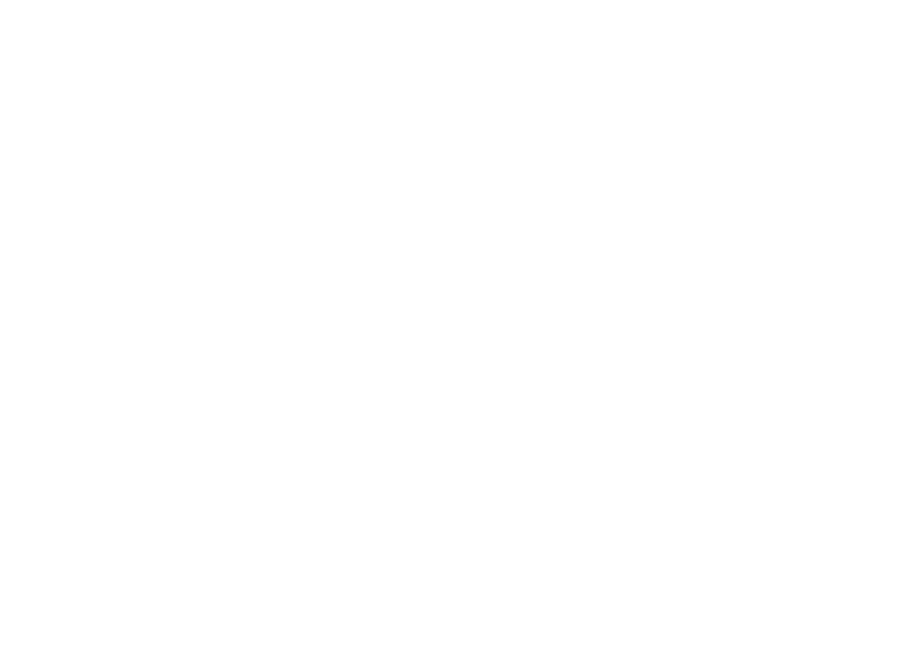

In [231]:
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G,font_size=16,font_family='NanumGothic',pos=pos, 
                 node_color=list(pr.values()),node_size=nsize,alpha=0.7,edge_color='.5', cmap=plt.cm.YlGn)

In [ ]:
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G,font_size=16,
                 font_family='NanumGothic', 
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color='.5', cmap=plt.cm.YlGn)

In [ ]:
# 원본 파일 전처리

df['text_cleaned'] = df['text'].apply(text_clean)
df['text_cleaned'] = df['text_cleaned'].apply(stopwords_del)

In [ ]:
# 원본 전처리 데이터 벡터화

tfidf = TfidfVectorizer(min_df = 5)
text = [" ".join(nouns) for nouns in df['text_nouns']]
tfidf.fit(text)
vector_ori = tfidf.transform(text).toarray()

In [ ]:
# label이 있는 데이터만 train

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5, random_state=0)
rfc.fit(vector,y)

In [ ]:
# 기존 값들 예측

rfc.predict(vector_test)

In [ ]:
# 예측값 입력

In [13]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0)
y = kmeans.fit_predict(vector)
test_df['label'] = y

In [18]:
test_df['label'].value_counts()

5    2636
0    1872
3    1549
1    1169
2    1143
9     632
7     623
8     255
6      63
4      58
Name: label, dtype: int64

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [249]:
result

NameError: name 'result' is not defined

In [109]:
from sklearn.cluster import DBSCAN

vector = np.array(vector)
model = DBSCAN(eps=0.3,min_samples=6, metric = "cosine")
result = model.fit_predict(vector)
result

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [110]:
test_df['result'] = result
test_df

,title,text,url,media,date,text_cleaned,text_nouns,result
0,우주선과 카누 - 케네스 브라워 [주일우의 내 인생의 책 ④],"[경향신문] \n\n\n\n머리가 다 큰 아이와 이야기를 하다가 문득, 그의 생각을...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-06-11,경향신문 머리가 다 큰 아이와 이야기를 하다가 문득 그의 생각을 온전히...,"[경향, 경향신문, 신문, 머리, 아이, 이야기, 그, 생각, 이해, 데, 애, 경...",-1
1,5당 비례대표 후보 토론회…더시민·열린민주 날선 공방 [선택 4·15],ㆍ최강욱 “열린민주당 열린 공천 실험 성공”\nㆍ김홍걸 “사회적 약자 배려 의석 빼...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-04-10,최강욱 열린민주당 열린 공천 실험 성공 김홍걸 사회적 약자 배려 의석 빼앗...,"[최강, 민주당, 열린, 공천, 실험, 성공, 김, 김홍, 홍, 사회적, 약자, 배...",-1
2,"이낙연 ""탄핵 정부"" 황교안 ""좌파 독재정권""… 첫 토론서 대립각",서울 종로구에 출마한 더불어민주당 이낙연(오른쪽) 후보와 미래통합당 황교안 후보가 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-04-07,서울 종로구에 출마한 더불어민주당 이낙연 오른쪽 후보와 미래통합당 황교안 후보가 ...,"[서울, 종로, 종로구, 구, 출마, 민주당, 낙, 낙연, 연, 오른쪽, 후보, 미...",-1
3,전세 종말론? 현장선 “갭투자 쌓여 월세로 급전환 쉽지 않다”,"""월세 전환이요? 말처럼 쉽지 않아요.""\n\n서울 개포동에서 공인중개사무소를 운영...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-04,월세 전환이요 말처럼 쉽지 않아요 서울 개포동에서 공인중개사무소를 운영하는...,"[월세, 전환, 말, 서울, 개포, 개포동, 동, 공인, 공인중개사무소, 중개, 사...",-1
4,총선후 정치지형 가를 10곳의 승부… 2년뒤 대선 구도까지 보인다,[총선 D―1]핵심 승부처 10곳의 의미는\n총선을 하루 앞두고 여야는 전국의 각 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-04-14,총선 D 핵심 승부처 곳의 의미는 총선을 하루 앞두고 여야는 전국의 각 격...,"[총선, 핵심, 승부처, 곳, 의미, 하루, 여야, 전국, 격전지, 화력, 집중, ...",-1
...,...,...,...,...,...,...,...,...
9995,“우리 삶은 바뀐 게 없다… 장애인 차별과 배제 멈춰 달라”,"[서울신문]\n“대통령이 바뀌고 정권이 바뀌었지만, 우리의 삶은 바뀐 게 없다.”\...",https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-04-21,서울신문 대통령이 바뀌고 정권이 바뀌었지만 우리의 삶은 바뀐 게 없다 ...,"[서울, 서울신문, 신문, 대통령, 정권, 우리, 삶, 일, 장애인, 차별, 철폐,...",-1
9996,<‘코로나19’ 초비상>신천지 外 또다른 집단 감염원 잡아야 ‘3월 대유행’ 막는다,"인구 68만명 천안, 68명 확진 \n\n댄스 교습소가 초기확산 진원 \n\n일부 ...",https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-03-02,인구 만명 천안 명 확진 댄스 교습소가 초기확산 진원 일부 교회 여...,"[인구, 만명, 천안, 명, 진, 댄스, 교습소, 초기, 초기확산, 확산, 진원, ...",-1
9997,오거돈 낙마 이어 박원순 유고 … 與 재집권 전략 '비상',2021년 4월 예정 보궐선거 판 커져 / 이재명·김경수 재판 등도 변수 / 통합당...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-07-11,년 월 예정 보궐선거 판 커져 이재명 김경수 재판 등도 변수 통합당...,"[년, 월, 예정, 보궐, 보궐선거, 선거, 판, 이재명, 김, 김경수, 경수, 재...",-1
9998,박원순 고소인 “4년간 성추행…인간답게 살고 싶다”,“그저 인간답게 살 수 있는 세상을 꿈꿉니다. 저는 살아 있는 사람입니다.”\n\n...,https://news.naver.com/main/read.nhn?mode=LPOD...,한겨레,2020-07-14,그저 인간답게 살 수 있는 세상을 꿈꿉니다 저는 살아 있는 사람입니다 박원...,"[인간, 수, 세상, 저, 사람, 박원, 박원순, 순, 서울, 서울시장, 시장, 성...",-1


In [150]:
len(test_df[test_df['result'] == 1])+len(test_df[test_df['result'] == 2])+\
len(test_df[test_df['result'] == 3])+len(test_df[test_df['result'] == 4])+\
len(test_df[test_df['result'] == 5])+\
len(test_df[test_df['result'] == 0])+len(test_df[test_df['result'] == -1])

10000

100%|█████████████████████████████████████████████████████████| 10/10 [3:32:40<00:00, 1276.06s/it]


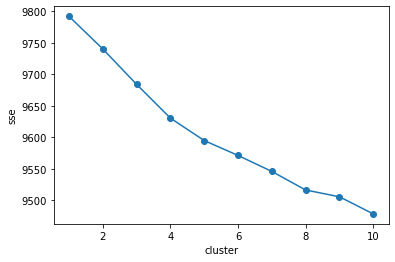

In [158]:
sse = []
for i in tqdm(range(1,11)) :
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(vector)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse, marker='o')
plt.xlabel('cluster')
plt.ylabel('sse')
plt.show()

In [236]:
sse2 = []
for i in tqdm(range(1,26)) :
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(vector)
    sse2.append(kmeans.inertia_)

plt.plot(range(1,11),sse2, marker='o')
plt.xlabel('cluster')
plt.ylabel('sse')
plt.show()

  8%|████▉                                                         | 2/25 [01:06<12:45, 33.30s/it]


MemoryError: Unable to allocate 1.77 GiB for an array with shape (10000, 23769) and data type float64

In [192]:
kmeans = KMeans(n_clusters=15, init='random', random_state=0)
y = kmeans.fit_predict(vector)

In [193]:
test_df['label'] = y
test_df

,title,text,url,media,date,text_cleaned,text_nouns,result,label
0,우주선과 카누 - 케네스 브라워 [주일우의 내 인생의 책 ④],"[경향신문] \n\n\n\n머리가 다 큰 아이와 이야기를 하다가 문득, 그의 생각을...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-06-11,경향신문 머리가 다 큰 아이와 이야기를 하다가 문득 그의 생각을 온전히...,"[경향, 경향신문, 신문, 머리, 아이, 이야기, 그, 생각, 이해, 데, 애, 경...",-1,2
1,5당 비례대표 후보 토론회…더시민·열린민주 날선 공방 [선택 4·15],ㆍ최강욱 “열린민주당 열린 공천 실험 성공”\nㆍ김홍걸 “사회적 약자 배려 의석 빼...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-04-10,최강욱 열린민주당 열린 공천 실험 성공 김홍걸 사회적 약자 배려 의석 빼앗...,"[최강, 민주당, 열린, 공천, 실험, 성공, 김, 김홍, 홍, 사회적, 약자, 배...",-1,1
2,"이낙연 ""탄핵 정부"" 황교안 ""좌파 독재정권""… 첫 토론서 대립각",서울 종로구에 출마한 더불어민주당 이낙연(오른쪽) 후보와 미래통합당 황교안 후보가 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-04-07,서울 종로구에 출마한 더불어민주당 이낙연 오른쪽 후보와 미래통합당 황교안 후보가 ...,"[서울, 종로, 종로구, 구, 출마, 민주당, 낙, 낙연, 연, 오른쪽, 후보, 미...",-1,1
3,전세 종말론? 현장선 “갭투자 쌓여 월세로 급전환 쉽지 않다”,"""월세 전환이요? 말처럼 쉽지 않아요.""\n\n서울 개포동에서 공인중개사무소를 운영...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-04,월세 전환이요 말처럼 쉽지 않아요 서울 개포동에서 공인중개사무소를 운영하는...,"[월세, 전환, 말, 서울, 개포, 개포동, 동, 공인, 공인중개사무소, 중개, 사...",-1,6
4,총선후 정치지형 가를 10곳의 승부… 2년뒤 대선 구도까지 보인다,[총선 D―1]핵심 승부처 10곳의 의미는\n총선을 하루 앞두고 여야는 전국의 각 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-04-14,총선 D 핵심 승부처 곳의 의미는 총선을 하루 앞두고 여야는 전국의 각 격...,"[총선, 핵심, 승부처, 곳, 의미, 하루, 여야, 전국, 격전지, 화력, 집중, ...",-1,1
...,...,...,...,...,...,...,...,...,...
9995,“우리 삶은 바뀐 게 없다… 장애인 차별과 배제 멈춰 달라”,"[서울신문]\n“대통령이 바뀌고 정권이 바뀌었지만, 우리의 삶은 바뀐 게 없다.”\...",https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-04-21,서울신문 대통령이 바뀌고 정권이 바뀌었지만 우리의 삶은 바뀐 게 없다 ...,"[서울, 서울신문, 신문, 대통령, 정권, 우리, 삶, 일, 장애인, 차별, 철폐,...",-1,2
9996,<‘코로나19’ 초비상>신천지 外 또다른 집단 감염원 잡아야 ‘3월 대유행’ 막는다,"인구 68만명 천안, 68명 확진 \n\n댄스 교습소가 초기확산 진원 \n\n일부 ...",https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-03-02,인구 만명 천안 명 확진 댄스 교습소가 초기확산 진원 일부 교회 여...,"[인구, 만명, 천안, 명, 진, 댄스, 교습소, 초기, 초기확산, 확산, 진원, ...",-1,8
9997,오거돈 낙마 이어 박원순 유고 … 與 재집권 전략 '비상',2021년 4월 예정 보궐선거 판 커져 / 이재명·김경수 재판 등도 변수 / 통합당...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-07-11,년 월 예정 보궐선거 판 커져 이재명 김경수 재판 등도 변수 통합당...,"[년, 월, 예정, 보궐, 보궐선거, 선거, 판, 이재명, 김, 김경수, 경수, 재...",-1,1
9998,박원순 고소인 “4년간 성추행…인간답게 살고 싶다”,“그저 인간답게 살 수 있는 세상을 꿈꿉니다. 저는 살아 있는 사람입니다.”\n\n...,https://news.naver.com/main/read.nhn?mode=LPOD...,한겨레,2020-07-14,그저 인간답게 살 수 있는 세상을 꿈꿉니다 저는 살아 있는 사람입니다 박원...,"[인간, 수, 세상, 저, 사람, 박원, 박원순, 순, 서울, 서울시장, 시장, 성...",-1,4


In [234]:
test_df.drop(['result','label'],axis=1, inplace=True)

In [235]:
test_df

,title,text,url,media,date,text_cleaned,text_nouns
0,우주선과 카누 - 케네스 브라워 [주일우의 내 인생의 책 ④],"[경향신문] \n\n\n\n머리가 다 큰 아이와 이야기를 하다가 문득, 그의 생각을...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-06-11,경향신문 머리가 다 큰 아이와 이야기를 하다가 문득 그의 생각을 온전히...,"[경향, 경향신문, 신문, 머리, 아이, 이야기, 그, 생각, 이해, 데, 애, 경..."
1,5당 비례대표 후보 토론회…더시민·열린민주 날선 공방 [선택 4·15],ㆍ최강욱 “열린민주당 열린 공천 실험 성공”\nㆍ김홍걸 “사회적 약자 배려 의석 빼...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-04-10,최강욱 열린민주당 열린 공천 실험 성공 김홍걸 사회적 약자 배려 의석 빼앗...,"[최강, 민주당, 열린, 공천, 실험, 성공, 김, 김홍, 홍, 사회적, 약자, 배..."
2,"이낙연 ""탄핵 정부"" 황교안 ""좌파 독재정권""… 첫 토론서 대립각",서울 종로구에 출마한 더불어민주당 이낙연(오른쪽) 후보와 미래통합당 황교안 후보가 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-04-07,서울 종로구에 출마한 더불어민주당 이낙연 오른쪽 후보와 미래통합당 황교안 후보가 ...,"[서울, 종로, 종로구, 구, 출마, 민주당, 낙, 낙연, 연, 오른쪽, 후보, 미..."
3,전세 종말론? 현장선 “갭투자 쌓여 월세로 급전환 쉽지 않다”,"""월세 전환이요? 말처럼 쉽지 않아요.""\n\n서울 개포동에서 공인중개사무소를 운영...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-04,월세 전환이요 말처럼 쉽지 않아요 서울 개포동에서 공인중개사무소를 운영하는...,"[월세, 전환, 말, 서울, 개포, 개포동, 동, 공인, 공인중개사무소, 중개, 사..."
4,총선후 정치지형 가를 10곳의 승부… 2년뒤 대선 구도까지 보인다,[총선 D―1]핵심 승부처 10곳의 의미는\n총선을 하루 앞두고 여야는 전국의 각 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-04-14,총선 D 핵심 승부처 곳의 의미는 총선을 하루 앞두고 여야는 전국의 각 격...,"[총선, 핵심, 승부처, 곳, 의미, 하루, 여야, 전국, 격전지, 화력, 집중, ..."
...,...,...,...,...,...,...,...
9995,“우리 삶은 바뀐 게 없다… 장애인 차별과 배제 멈춰 달라”,"[서울신문]\n“대통령이 바뀌고 정권이 바뀌었지만, 우리의 삶은 바뀐 게 없다.”\...",https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-04-21,서울신문 대통령이 바뀌고 정권이 바뀌었지만 우리의 삶은 바뀐 게 없다 ...,"[서울, 서울신문, 신문, 대통령, 정권, 우리, 삶, 일, 장애인, 차별, 철폐,..."
9996,<‘코로나19’ 초비상>신천지 外 또다른 집단 감염원 잡아야 ‘3월 대유행’ 막는다,"인구 68만명 천안, 68명 확진 \n\n댄스 교습소가 초기확산 진원 \n\n일부 ...",https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-03-02,인구 만명 천안 명 확진 댄스 교습소가 초기확산 진원 일부 교회 여...,"[인구, 만명, 천안, 명, 진, 댄스, 교습소, 초기, 초기확산, 확산, 진원, ..."
9997,오거돈 낙마 이어 박원순 유고 … 與 재집권 전략 '비상',2021년 4월 예정 보궐선거 판 커져 / 이재명·김경수 재판 등도 변수 / 통합당...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-07-11,년 월 예정 보궐선거 판 커져 이재명 김경수 재판 등도 변수 통합당...,"[년, 월, 예정, 보궐, 보궐선거, 선거, 판, 이재명, 김, 김경수, 경수, 재..."
9998,박원순 고소인 “4년간 성추행…인간답게 살고 싶다”,“그저 인간답게 살 수 있는 세상을 꿈꿉니다. 저는 살아 있는 사람입니다.”\n\n...,https://news.naver.com/main/read.nhn?mode=LPOD...,한겨레,2020-07-14,그저 인간답게 살 수 있는 세상을 꿈꿉니다 저는 살아 있는 사람입니다 박원...,"[인간, 수, 세상, 저, 사람, 박원, 박원순, 순, 서울, 서울시장, 시장, 성..."


In [199]:
df.iloc[0]

title                            무너지는 일과 삶의 경계···노동이 녹아내린다
text     이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...
url      https://news.naver.com/main/read.nhn?mode=LPOD...
media                                                 경향신문
date                                            2020-01-01
Name: 0, dtype: object

In [214]:
df['text_cleaned'] = df['text'].apply(text_clean)

text_nouns_list = []

for text in tqdm(df['text_cleaned']): 
    text_nouns = kkma.nouns(text) # 명사만 추출하기, 결과값은 명사 리스트
    text_nouns_list.append(text_nouns)

df['text_nouns'] = text_nouns_list
text = [" ".join(nouns) for nouns in df['text_nouns']]
tfidf.fit(text)
vector_test = tfidf.transform(text).toarray()

100%|█████████████████████████████████████████████████████| 29041/29041 [3:29:49<00:00,  2.31it/s]


In [228]:
vector.shape

(10000, 23769)

In [221]:
vector_test.shape

(29041, 42467)

In [226]:
kmeans = KMeans(n_clusters=15, init='random', random_state=0)
y = kmeans.fit_predict(vector)

MemoryError: Unable to allocate 1.77 GiB for an array with shape (10000, 23769) and data type float64

In [225]:
kmeans.predict(vector_test)

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5, random_state=0)

In [220]:
rfc.fit(vector,y)

RandomForestClassifier(n_estimators=5, random_state=0)

In [227]:
rfc.fit(vector,y)
rfc.predict(vector_test)

MemoryError: Unable to allocate 4.59 GiB for an array with shape (29041, 42467) and data type float32